# Crab Molt dataset work !

In [1]:
import pandas as pd               #All useful libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Crab_molt.csv')  #Importing the dataset !
data.head(5)

,post molt size,pre molt size
0,127.7,113.6
1,133.2,118.1
2,135.3,119.9
3,143.3,126.2
4,139.3,126.7


In [3]:
df = data.dropna(subset=['post molt size', 'pre molt size'])
df   #cleaning the daTASET

,post molt size,pre molt size
0,127.7,113.6
1,133.2,118.1
2,135.3,119.9
3,143.3,126.2
4,139.3,126.7
...,...,...
467,150.3,135.9
468,151.2,135.6
469,143.5,129.6
470,148.3,134.1


In [11]:
post_stats = df['post molt size'].describe()
post_median = df['post molt size'].median()
post_mode = df['post molt size'].mode()[0]
post_skewness = skew(df['post molt size'])
post_kurtosis = kurtosis(df['post molt size'])
print("Descriptive Statistics for post molt:")
print(post_stats)
print(f"Median: {post_stats}")
print(f"Mode: {post_mode}")
print(f"Skewness: {post_skewness}")
print(f"Kurtosis: {post_kurtosis}")

Descriptive Statistics for post molt:
count    472.000000
mean     143.897669
std       14.640602
min       38.800000
25%      137.975000
50%      147.400000
75%      153.425000
max      166.800000
Name: post molt size, dtype: float64
Median: count    472.000000
mean     143.897669
std       14.640602
min       38.800000
25%      137.975000
50%      147.400000
75%      153.425000
max      166.800000
Name: post molt size, dtype: float64
Mode: 151.5
Skewness: -2.3469021583966594
Kurtosis: 10.116042372071325


<AxesSubplot:xlabel='post molt size', ylabel='Density'>

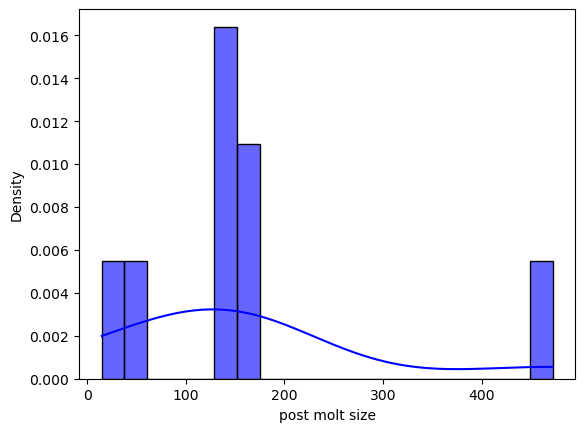

In [10]:
sns.histplot(post_stats, kde=True, color='blue', label='post', stat='density', bins=20, alpha=0.6)

In [12]:
pre_stats = df['pre molt size'].describe()
pre_median = df['pre molt size'].median()
pre_mode = df['pre molt size'].mode()[0]
pre_skewness = skew(df['pre molt size'])
pre_kurtosis = kurtosis(df['pre molt size'])
print("Descriptive Statistics for pre molt:")
print(pre_stats)
print(f"Median: {pre_stats}")
print(f"Mode: {pre_mode}")
print(f"Skewness: {pre_skewness}")
print(f"Kurtosis: {pre_kurtosis}")

Descriptive Statistics for pre molt:
count    472.000000
mean     129.211864
std       15.864520
min       31.100000
25%      121.675000
50%      132.800000
75%      140.000000
max      155.100000
Name: pre molt size, dtype: float64
Median: count    472.000000
mean     129.211864
std       15.864520
min       31.100000
25%      121.675000
50%      132.800000
75%      140.000000
max      155.100000
Name: pre molt size, dtype: float64
Mode: 138.3
Skewness: -2.0034871763549766
Kurtosis: 6.766321650922


<AxesSubplot:xlabel='pre molt size', ylabel='Density'>

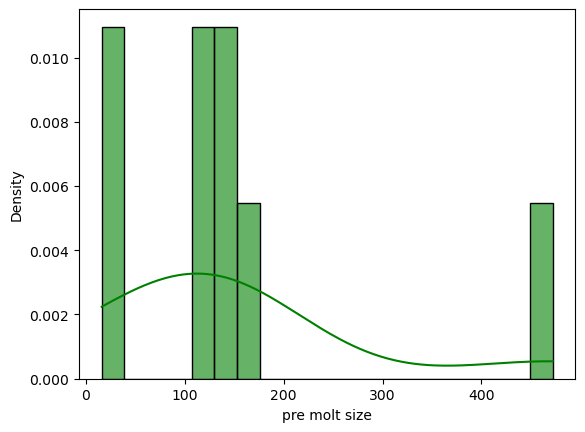

In [13]:
sns.histplot(pre_stats, kde=True, color='green', label='pre molt', stat='density', bins=20, alpha=0.6)

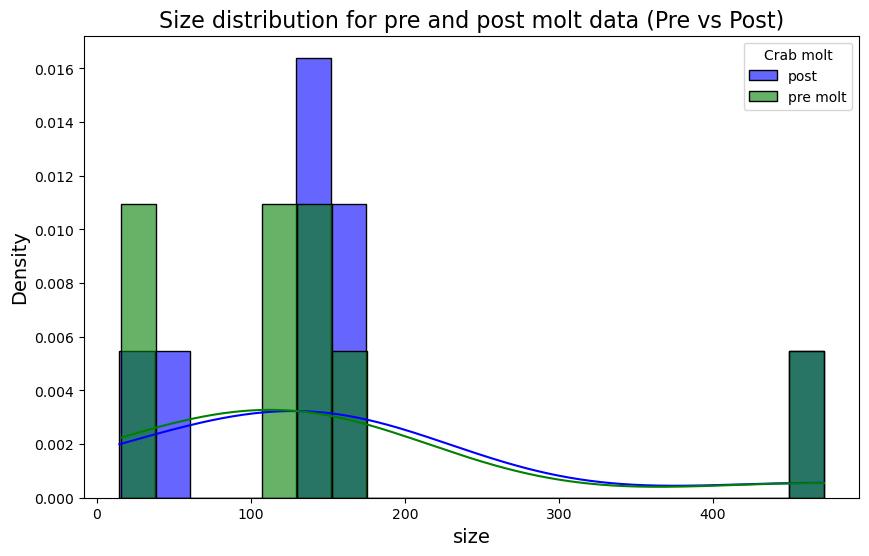

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(post_stats, kde=True, color='blue', label='post', stat='density', bins=20, alpha=0.6)
sns.histplot(pre_stats, kde=True, color='green', label='pre molt', stat='density', bins=20, alpha=0.6)
plt.title('Size distribution for pre and post molt data (Pre vs Post)', fontsize=16)
plt.xlabel('size', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Crab molt')
plt.show()

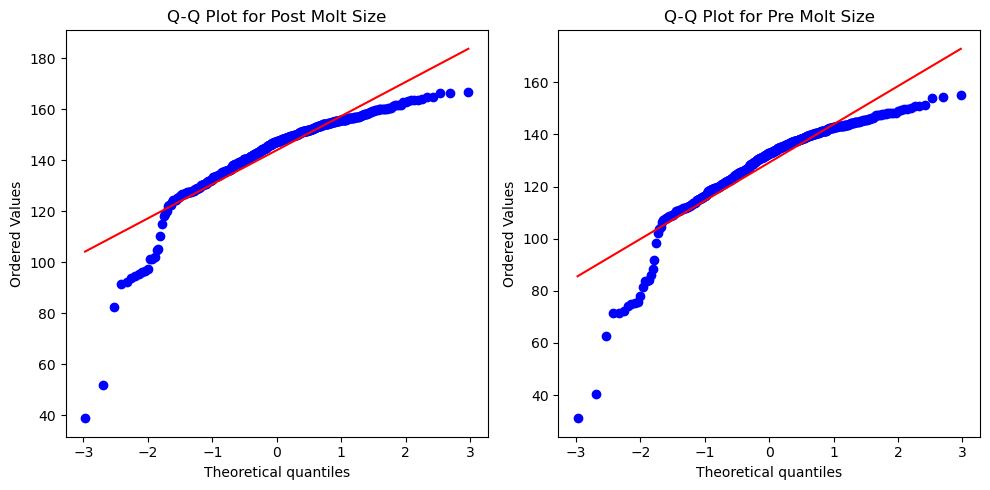

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the data for post molt and pre molt
post_data = df['post molt size']
pre_data = df['pre molt size']

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Q-Q plot for post molt size
plt.subplot(1, 2, 1)
stats.probplot(post_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Post Molt Size")

# Q-Q plot for pre molt size
plt.subplot(1, 2, 2)
stats.probplot(pre_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Pre Molt Size")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


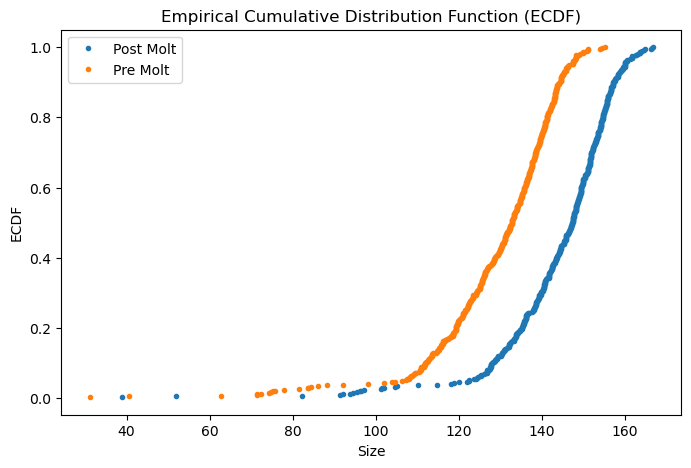

In [18]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y


post_molt = df['post molt size']
pre_molt = df['pre molt size']

# Compute ECDF for post molt and pre molt
x_post, y_post = ecdf(post_molt)
x_pre, y_pre = ecdf(pre_molt)

# Plot the ECDFs
plt.figure(figsize=(8, 5))

# ECDF for post molt size
plt.plot(x_post, y_post, marker='.', linestyle='none', label='Post Molt')

# ECDF for pre molt size
plt.plot(x_pre, y_pre, marker='.', linestyle='none', label='Pre Molt')

# Add labels and title
plt.xlabel('Size')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.legend()

# Show the plot
plt.show()

In [19]:
post_molt = df['post molt size']
pre_molt = df['pre molt size']

# Calculate means
mean_post = np.mean(post_molt)
mean_pre = np.mean(pre_molt)

# Calculate standard deviations (using sample standard deviation, ddof=1)
std_post = np.std(post_molt, ddof=1)
std_pre = np.std(pre_molt, ddof=1)

# Calculate the pooled standard deviation
pooled_std = np.sqrt(((len(post_molt) - 1) * std_post**2 + (len(pre_molt) - 1) * std_pre**2) / (len(post_molt) + len(pre_molt) - 2))

# Calculate Cohen's d
cohen_d = (mean_post - mean_pre) / pooled_std

# Print the result
print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.9620678692342459


In [20]:
# Define the data for post molt size and pre molt size
post_molt = df['post molt size']
pre_molt = df['pre molt size']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(post_molt, pre_molt)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 14.779567045859308
P-value: 1.3090298771684544e-44
